In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score as AS
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv('automobile.csv')
data.head()

,Unnamed: 0,symboling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   normalised-losses  164 non-null    float64
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       203 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheel        205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  lenght             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

In [4]:
data.isnull().sum()

Unnamed: 0            0
symboling             0
normalised-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheel           0
engine-location       0
wheel-base            0
lenght                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horse-power           2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [5]:
data["normalised-losses"].fillna(122.0, inplace=True)

In [6]:
data.head()

,Unnamed: 0,symboling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [7]:
data.dropna(subset = ['price'], axis=0, inplace=True)
data.dropna(subset = ['normalised-losses'], axis = 0, inplace = True)
data.dropna(subset = ['num-of-doors'], axis = 0, inplace = True)
data.dropna(subset = ['bore'], axis = 0, inplace = True)
data.dropna(subset = ['stroke'], axis = 0, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         195 non-null    int64  
 1   symboling          195 non-null    int64  
 2   normalised-losses  195 non-null    float64
 3   make               195 non-null    object 
 4   fuel-type          195 non-null    object 
 5   aspiration         195 non-null    object 
 6   num-of-doors       195 non-null    object 
 7   body-style         195 non-null    object 
 8   drive-wheel        195 non-null    object 
 9   engine-location    195 non-null    object 
 10  wheel-base         195 non-null    float64
 11  lenght             195 non-null    float64
 12  width              195 non-null    float64
 13  height             195 non-null    float64
 14  curb-weight        195 non-null    int64  
 15  engine-type        195 non-null    object 
 16  num-of-cylinders   195 non

In [9]:
data["normalised-losses"]=data["normalised-losses"].astype("float64")



In [10]:
data["price"]=data["price"].astype("int64")


In [11]:
r = ['highway-mpg','price','city-mpg','peak-rpm','horse-power','compression-ratio','stroke','bore','engine-size','curb-weight',
    'wheel-base','lenght','width','height','curb-weight']
for column in r:
    data[column] = data[column].replace(0,np.NaN)
    mean = int(data[column].mean(skipna = True))
    data[column] = data[column].replace(np.NaN,mean)

(0.0, 47877.068816461164)

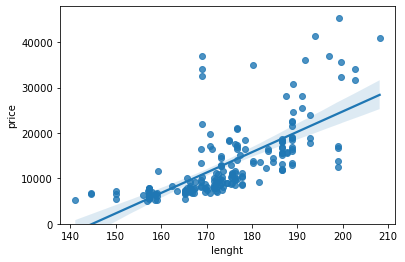

In [12]:
sns.regplot(x="lenght", y="price", data=data)
plt.ylim(0,)

In [13]:
data['price'].min()

5118

In [14]:
data['price'].max()

45400

In [15]:
X_features = list(data.columns)
X_features.remove('price')
X_features

['Unnamed: 0',
 'symboling',
 'normalised-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheel',
 'engine-location',
 'wheel-base',
 'lenght',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horse-power',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

(0.0, 48207.51949112943)

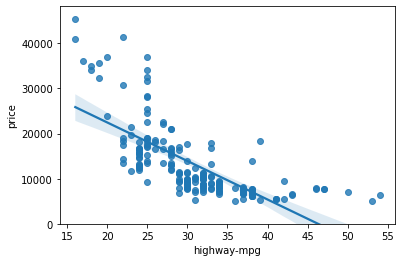

In [16]:
##correlation between highway-mpg and price
sns.regplot(x="highway-mpg", y="price", data=data)
plt.ylim(0,)

(0.0, 47414.1)

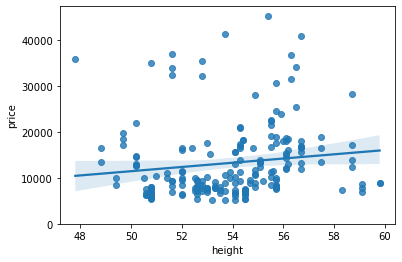

In [17]:
sns.regplot(x= 'height', y="price", data=data)
plt.ylim(0,)

(0.0, 47880.42432241481)

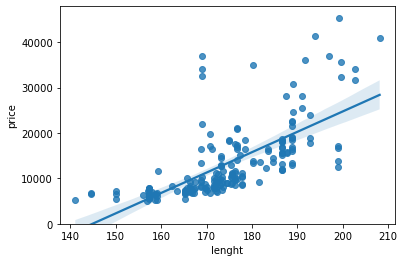

In [18]:
sns.regplot(x= 'lenght', y="price", data=data)
plt.ylim(0,)

(0.0, 47613.00273459792)

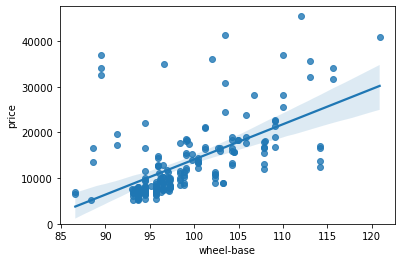

In [19]:
sns.regplot(x= 'wheel-base', y="price", data=data)
plt.ylim(0,)

In [20]:
df_test= data[["drive-wheel", "body-style","price"]]
df_grp= df_test.groupby(["drive-wheel", "body-style",],as_index=False).mean()
##pivoting for easy understanding

df_pivot=df_grp.pivot(index= "drive-wheel", columns="body-style" )
print(df_pivot)

                  price                                            \
body-style  convertible       hardtop     hatchback         sedan   
drive-wheel                                                         
4wd                 NaN           NaN   7603.000000  12647.333333   
fwd             11595.0   8249.000000   8396.387755   9816.905660   
rwd             23949.6  24202.714286  14714.285714  21711.833333   

                           
body-style          wagon  
drive-wheel                
4wd           9095.750000  
fwd           9997.333333  
rwd          16994.222222  


In [21]:
encode_data = pd.get_dummies(data[X_features], drop_first = True)
list(encode_data.columns)

['Unnamed: 0',
 'symboling',
 'normalised-losses',
 'wheel-base',
 'lenght',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horse-power',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'fuel-type_gas',
 'aspiration_turbo',
 'num-of-doors_two',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'drive-wheel_fwd',
 'drive-wheel_rwd',
 'engine-location_rear',
 'engine-type_l',
 'engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'num-of-cylinders_five',
 'num-of-cylinders_four',
 'num-of-cylinders_six',
 'num-of-cylinders_three',
 'num-of-cylinders_twelv

In [22]:
X = encode_data
y = data.price

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,)

In [24]:
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

In [25]:
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model_fit.predict(X_test)
y_pred

array([ 8277.46380335, 30716.1417542 ,  8074.2760479 , 18295.7221881 ,
        5655.52572222,  7772.5582986 , 11530.93098475, 27999.52761542,
        5785.81254917,  6659.07637536, 15071.01034613, 14296.48713182,
        5894.10922479, 19196.77284005, 12854.24609702,  6895.30201242,
        6239.51139263,  7663.61954901, 17491.3447838 , 11028.68243833,
       15138.02018894,  4219.76676758, 32312.72028477, 40752.89892412,
        9874.38373046, 14255.81496945,  5907.64666265, 14764.05496207,
        6370.08631764, 16792.19902745,  7041.36934504, 14358.56602218,
        7239.80689735,  7533.64374667, 17045.10279361, 17233.88742622,
       14764.60337754, 16878.32235972, 13396.51141643, 15892.39058618,
       11384.10280885, 14378.56956716, 11494.46465301,  6573.16630845,
       15921.4381628 , 15445.88921436,  8611.15530688, 18044.89716713,
        8964.7353174 , 34691.51185964, 15466.57548798, 11821.84318969,
       11220.52281689,  8592.07780255,  5838.81537017,  8758.2876186 ,
      

In [27]:
print(model_fit.intercept_)

12691.2794117647


In [28]:
print(model_fit.coef_)

[ 8.93520581e+03  2.66127370e+02  5.72680141e+01  1.72252528e+03
 -1.40561711e+03  1.36216840e+02 -4.65336734e+02  3.84783768e+03
  1.19682743e+03 -2.35114158e+02 -2.01051932e+02 -1.24720010e+03
  3.47629406e+01  6.40284594e+02  5.16601019e+02  2.10366041e+02
 -2.55315954e+02  2.78344478e+02 -1.53939211e+02 -2.35658899e+03
 -2.43867093e+03 -1.14934182e+03 -3.72949242e+02 -3.11973243e+03
 -1.88989205e+03  3.36513040e-11 -3.93861388e+03 -5.45782857e+03
 -2.77222590e+03 -3.67034959e+03 -1.31509325e+03 -2.84466760e+03
 -2.90240125e+03 -2.96611024e+03 -1.07629219e+04 -8.72367123e+03
 -7.53069589e+03 -7.88669044e+02  7.74164104e+02 -3.18265127e+02
 -5.17015112e+02 -8.38951566e+02 -9.22533730e+02 -8.34585508e+02
  3.81895654e+02  6.79957801e+02  9.09494702e-13 -2.69076858e+03
  9.02481084e+02 -2.96611024e+03 -1.97588361e+02 -1.89880215e+03
 -3.24544282e+03 -2.31332924e+03 -1.53939211e+02  0.00000000e+00
  9.87583852e+02  7.88669044e+02  4.25641770e+01  7.56330917e+02
  2.90049597e+02  0.00000

In [29]:
from sklearn import metrics
sk_mean_ab_error = metrics.mean_absolute_error(y_test, y_pred)
sk_mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
sk_root_sq_error = np.sqrt(sk_mean_sq_error)
sk_determinant_coef = metrics.r2_score(y_test, y_pred)
sk_exp_variance = metrics.explained_variance_score(y_test, y_pred)
sk_linear_model_ev = [[sk_mean_ab_error, sk_mean_sq_error, sk_root_sq_error, sk_determinant_coef, sk_exp_variance]]
sk_linear_model_assessment = pd.DataFrame(sk_linear_model_ev, index =["Estimates"], columns = ["Sk mean absolute error", "Sk mean squared error","Sk root mean squared error", "Sk determinant coefficient", "Sk variance score"])
sk_linear_model_assessment
y = data.price

In [30]:
print(sk_linear_model_assessment)

           Sk mean absolute error  Sk mean squared error  \
Estimates             3526.133207           4.952917e+07   

           Sk root mean squared error  Sk determinant coefficient  \
Estimates                 7037.696696                    0.474974   

           Sk variance score  
Estimates           0.487598  


In [31]:
print(sk_determinant_coef)

0.47497395078166027


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

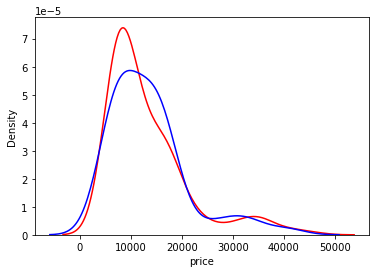

In [32]:
## Distribution plot

axl=sns.distplot(data['price'], hist=False, color="r", label="Actual Value")

sns.distplot(y_pred, hist=False, color="b", label="Fitted Value", ax=axl)

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_fit,X_train,y_train, cv = 3)
print(scores)

[0.72131233 0.84107993 0.87759111]


In [34]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_score(model_fit,X_train,y_train, cv = 3)
print(predict)

[0.72131233 0.84107993 0.87759111]


In [35]:
data.corr()

,Unnamed: 0,symboling,normalised-losses,wheel-base,lenght,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.141639,-0.226367,0.112817,0.150381,0.038230,0.228610,0.056374,-0.075232,0.243516,-0.160810,0.154266,-0.024390,-0.175934,0.011533,0.007165,-0.124912
symboling,-0.141639,1.000000,0.453564,-0.534813,-0.362498,-0.246034,-0.521838,-0.231330,-0.067926,-0.143309,-0.007221,-0.175032,0.069225,0.227092,0.016954,0.085525,-0.084899
normalised-losses,-0.226367,0.453564,1.000000,-0.043452,0.033233,0.093690,-0.353793,0.108670,0.142836,-0.025470,0.053888,-0.112986,0.217723,0.213593,-0.208021,-0.166282,0.138447
wheel-base,0.112817,-0.534813,-0.043452,1.000000,0.875691,0.815729,0.589116,0.781624,0.567293,0.492602,0.160784,0.253504,0.376691,-0.350436,-0.501888,-0.571296,0.585840
lenght,0.150381,-0.362498,0.033233,0.875691,1.000000,0.857308,0.487915,0.881669,0.686683,0.606980,0.127226,0.154362,0.589037,-0.275887,-0.702443,-0.730439,0.692628
width,0.038230,-0.246034,0.093690,0.815729,0.857308,1.000000,0.307081,0.866850,0.739804,0.542241,0.191020,0.187264,0.621188,-0.247496,-0.657535,-0.701565,0.752035
height,0.228610,-0.521838,-0.353793,0.589116,0.487915,0.307081,1.000000,0.305499,0.026339,0.179087,-0.061688,0.253849,-0.081192,-0.255810,-0.108847,-0.159043,0.136897
curb-weight,0.056374,-0.231330,0.108670,0.781624,0.881669,0.866850,0.305499,1.000000,0.856988,0.643867,0.169941,0.161203,0.762088,-0.278499,-0.776856,-0.818045,0.834715
engine-size,-0.075232,-0.067926,0.142836,0.567293,0.686683,0.739804,0.026339,0.856988,1.000000,0.581608,0.211887,0.024890,0.845274,-0.217761,-0.716206,-0.737465,0.887343
bore,0.243516,-0.143309,-0.025470,0.492602,0.606980,0.542241,0.179087,0.643867,0.581608,1.000000,-0.053699,-0.005938,0.572244,-0.273456,-0.602041,-0.607942,0.542844


<AxesSubplot:>

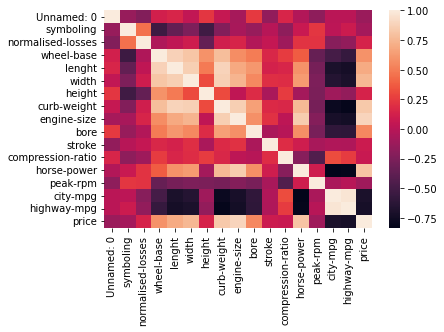

In [36]:
sns.heatmap(data.corr())

In [37]:
data.columns

Index(['Unnamed: 0', 'symboling', 'normalised-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheel',
       'engine-location', 'wheel-base', 'lenght', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horse-power',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [38]:
data.drop(['symboling','normalised-losses', 'fuel-type', 'num-of-doors', 'body-style', 'engine-location', 'height', 'engine-type', 'num-of-cylinders', 'engine-size', 'stroke', 'compression-ratio','peak-rpm', 'Unnamed: 0'], axis = 1, inplace = True)



In [39]:
data.head()

,make,aspiration,drive-wheel,wheel-base,lenght,width,curb-weight,fuel-system,bore,horse-power,city-mpg,highway-mpg,price
0,alfa-romero,std,rwd,88.6,168.8,64.1,2548,mpfi,3.47,111.0,21,27,13495
1,alfa-romero,std,rwd,88.6,168.8,64.1,2548,mpfi,3.47,111.0,21,27,16500
2,alfa-romero,std,rwd,94.5,171.2,65.5,2823,mpfi,2.68,154.0,19,26,16500
3,audi,std,fwd,99.8,176.6,66.2,2337,mpfi,3.19,102.0,24,30,13950
4,audi,std,4wd,99.4,176.6,66.4,2824,mpfi,3.19,115.0,18,22,17450


In [40]:
new_X_features = list(data.columns)
new_X_features.remove('price')
new_X_features

['make',
 'aspiration',
 'drive-wheel',
 'wheel-base',
 'lenght',
 'width',
 'curb-weight',
 'fuel-system',
 'bore',
 'horse-power',
 'city-mpg',
 'highway-mpg']

In [41]:
new_encode_data = pd.get_dummies(data[new_X_features], drop_first = True)
list(new_encode_data.columns)

['wheel-base',
 'lenght',
 'width',
 'curb-weight',
 'bore',
 'horse-power',
 'city-mpg',
 'highway-mpg',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'aspiration_turbo',
 'drive-wheel_fwd',
 'drive-wheel_rwd',
 'fuel-system_2bbl',
 'fuel-system_idi',
 'fuel-system_mfi',
 'fuel-system_mpfi',
 'fuel-system_spdi',
 'fuel-system_spfi']

In [42]:
X = new_encode_data
y = data.price


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,)


In [44]:
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)



In [45]:
new_model_fit = LinearRegression()
new_model_fit.fit(X_train, y_train)


LinearRegression()

In [46]:
new_y_pred = new_model_fit.predict(X_test)
new_y_pred

array([ 8183.14804214, 31049.59302127,  9437.13143773, 20039.6424666 ,
        5804.91288536,  7674.00057714, 10799.88882333, 28147.78664423,
        4447.62722526,  5214.58878573, 16221.78248421,  8929.18647521,
        6199.01209307, 19237.26439333, 10192.42071629, 21560.97394456,
        6186.28616499,  5731.58393332, 18662.78093011, 21840.64768295,
       15193.94282039,  5954.51585925, 21950.92589121, 35788.04436481,
       11622.81969034, 14611.19218682,  6303.24460506, 17063.59430128,
        7098.45185533, 17038.2480997 , 21560.97394456, 14565.92890677,
        6324.33257995,  8611.08224232, 18158.10970039, 16909.6426905 ,
        8888.68267706, 16801.02086558, 13974.05213027, 15006.42690832,
       10265.18181266, 14958.76263129, 10455.58070139,  6408.76739686,
       14737.67988897, 17955.21878469,  8980.52038844, 17982.58428192,
        9844.22322007, 33943.52723211, 15404.70321803, 11718.16301025,
       10026.02226679,  8235.47225479,  6314.75219491,  8647.89103277,
      

In [47]:
from sklearn import metrics
new_sk_mean_ab_error = metrics.mean_absolute_error(y_test, new_y_pred)
new_sk_mean_sq_error = metrics.mean_squared_error(y_test, new_y_pred)
new_sk_root_sq_error = np.sqrt(sk_mean_sq_error)
new_sk_determinant_coef = metrics.r2_score(y_test, new_y_pred)
new_sk_exp_variance = metrics.explained_variance_score(y_test, new_y_pred)
new_sk_linear_model_ev = [[sk_mean_ab_error, sk_mean_sq_error, sk_root_sq_error, sk_determinant_coef, sk_exp_variance]]
new_sk_linear_model_assessment = pd.DataFrame(sk_linear_model_ev, index =["Estimates"], columns = ["new_Sk mean absolute error", "new_Sk mean squared error","new_Sk root mean squared error", "new_Sk determinant coefficient", "new_Sk variance score"])
new_sk_linear_model_assessment
y = data.price

In [48]:
print(new_sk_determinant_coef * 100)

81.76894206021497


In [49]:
print(new_sk_linear_model_assessment)

           new_Sk mean absolute error  new_Sk mean squared error  \
Estimates                 3526.133207               4.952917e+07   

           new_Sk root mean squared error  new_Sk determinant coefficient  \
Estimates                     7037.696696                        0.474974   

           new_Sk variance score  
Estimates               0.487598  


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

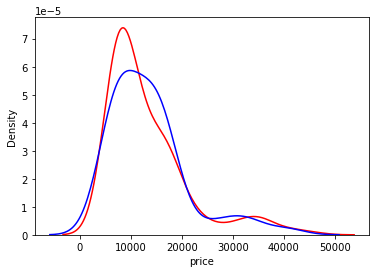

In [50]:
## Distribution plot

## Distribution plot

axl=sns.distplot(data['price'], hist=False, color="r", label="Actual Value")

sns.distplot(y_pred, hist=False, color="b", label="Fitted Value", ax=axl)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

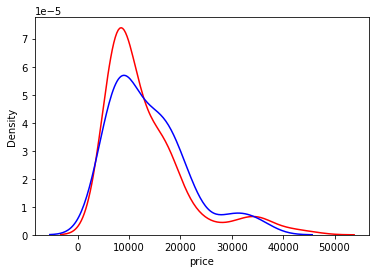

In [51]:

axl=sns.distplot(data['price'], hist=False, color="r", label="Actual Value")

sns.distplot(new_y_pred, hist=False, color="b", label="Fitted Value", ax=axl)



In [52]:
data_predict = ({'new_encode_data':X_test, 'Actual Price':y_test, 'Model Predicted Price': new_y_pred})
data_predict

{'new_encode_data': array([[-0.35522141, -0.05588003, -0.1928394 , ..., -0.90184995,
         -0.19536617,  0.        ],
        [ 1.78066269,  1.81407382,  2.33332295, ...,  1.10883191,
         -0.19536617,  0.        ],
        [-0.74652842, -0.44745156, -0.83586254, ...,  1.10883191,
         -0.19536617,  0.        ],
        ...,
        [ 1.24261555,  1.05490452,  2.05774161, ..., -0.90184995,
         -0.19536617,  0.        ],
        [-0.04543669,  0.27975271,  0.31239307, ..., -0.90184995,
         -0.19536617,  0.        ],
        [ 0.54152383,  0.10394508,  0.31239307, ...,  1.10883191,
         -0.19536617,  0.        ]]),
 'Actual Price': 148     8013
 17     36880
 165     9298
 105    19699
 77      6189
 163     8058
 64     11245
 16     41315
 121     6692
 120     6229
 194    12940
 19      6295
 91      6649
 10     16430
 174    10698
 126    32528
 78      6669
 122     7609
 202    21485
 128    37028
 133    12170
 154     7898
 75     16503
 49     36000
 1

In [54]:
print(new_model_fit.intercept_)

12691.279411764697


In [55]:
print(new_model_fit.coef_)

[ 7.95701980e+02 -1.13473834e+03  1.13192851e+03  3.35099572e+03
  1.98691055e+01  1.08797835e+03  9.12468842e+02 -4.74046121e+02
  1.34696989e+02  9.48602072e+02 -1.29389885e+02 -8.79581840e+02
 -4.59480091e+02 -4.01001798e+02  6.00000483e+02 -6.86093869e+02
  1.18097842e+03  9.09494702e-13 -9.29471447e+02 -9.26560970e+02
 -1.38221495e+03 -7.27135760e+02  2.28737584e+02 -5.05277047e+02
  6.33333412e+01 -9.63948176e+02 -1.53929034e+03 -6.77420910e+02
 -5.56037922e+02  1.60135214e+02  3.62126752e+02  8.97470582e+02
  8.06210081e+02  2.99969129e+02  5.23103558e+01  7.39756109e+02
  3.81887225e+02  0.00000000e+00]
